In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mediante estos comandos se leen los datos del primer archivo.
df1 = pd.read_csv("sargento-270218.csv", header=None, names=['Date', 'AP', 'TEMP', 'WL'])
df1.AP=pd.to_numeric(df1.AP, errors='coerce')
df1.TEMP=pd.to_numeric(df1.TEMP, errors='coerce')
df1.WL=pd.to_numeric(df1.WL, errors='coerce')
df1.head()

,Date,AP,TEMP,WL
1,02/04/2018 09:45:00,108.068,17.094,0.060
2,02/04/2018 10:00:00,107.815,16.903,0.035
3,02/04/2018 10:15:00,107.791,16.903,0.032
4,02/04/2018 10:30:00,107.791,16.903,0.032
5,02/04/2018 10:45:00,107.791,16.903,0.032


In [3]:
#Ahora, leemos los datos del segundo archivo.
df2 = pd.read_csv("sargento-salinidad-270218.csv", header=None, names=[ 'Date', 'CHR', 'TEMP', 'SC', 'SALY'])
df2.CHR=pd.to_numeric(df2.CHR, errors='coerce')
df2.TEMP=pd.to_numeric(df2.TEMP, errors='coerce')
df2.SC=pd.to_numeric(df2.SC, errors='coerce')
df2.SALY=pd.to_numeric(df2.SALY, errors='coerce')
df2.head()

,Date,CHR,TEMP,SC,SALY
2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235
3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482
4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203
5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595
6,02/04/2018 10:45:00,50958.7,17.11,60050.6,40.2458


In [4]:
#Convertimos la variable temporal, Date, es decir, numeramos el mes de cada archivo.
df1['Ndate'] = pd.to_datetime(df1['Date'], format='%m/%d/%Y %H:%M:%S')
df1['month'] = df1['Ndate'].dt.month
df1.head()

,Date,AP,TEMP,WL,Ndate,month
1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


In [5]:
df2['Ndate'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y %H:%M:%S')
df2['month'] = df2['Ndate'].dt.month
df2.head()

,Date,CHR,TEMP,SC,SALY,Ndate,month
2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235,2018-02-04 09:45:00,2
3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482,2018-02-04 10:00:00,2
4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203,2018-02-04 10:15:00,2
5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595,2018-02-04 10:30:00,2
6,02/04/2018 10:45:00,50958.7,17.11,60050.6,40.2458,2018-02-04 10:45:00,2


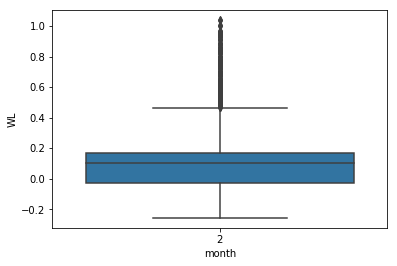

In [6]:
#Gráfica del nivel del mar (boxplot)
ax = sns.boxplot(x="month", y="WL", data=df1)
plt.show()

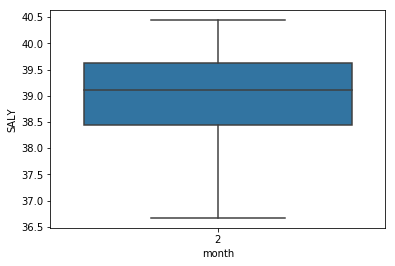

In [7]:
#Gráfica de la salinidad.
ax = sns.boxplot(x="month", y="SALY", data=df2)
plt.show()

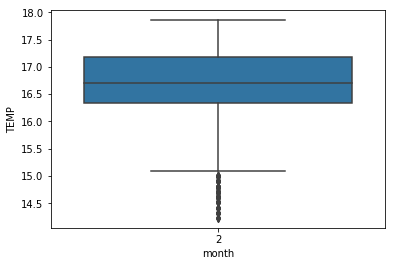

In [8]:
#Gráfica de la temperatura.
ax = sns.boxplot(x="month", y="TEMP", data=df1)
plt.show()

In [9]:
df1.describe()

,AP,TEMP,WL,month
count,2216.000000,2216.000000,2216.000000,2216.0
mean,108.472155,16.676223,0.100208,2.0
std,2.170574,0.756794,0.215948,0.0
min,104.878000,14.230000,-0.257000,2.0
25%,107.199750,16.332000,-0.026000,2.0
50%,108.488000,16.713000,0.102000,2.0
75%,109.178000,17.189000,0.170000,2.0
max,117.899000,17.855000,1.038000,2.0


In [10]:
df2.describe()

,CHR,TEMP,SC,SALY,month
count,2217.000000,2217.000000,2217.000000,2217.000000,2217.0
mean,49434.945737,16.901899,58526.414975,39.091827,2.0
std,1147.615340,0.670644,922.173605,0.697109,0.0
min,46569.900000,14.100000,55305.400000,36.669100,2.0
25%,48410.500000,16.530000,57655.400000,38.433300,2.0
50%,49294.000000,16.850000,58557.500000,39.114300,2.0
75%,50068.200000,17.390000,59244.200000,39.634000,2.0
max,52095.300000,18.100000,60306.400000,40.440200,2.0


In [11]:
df3 = pd.concat([df1['WL'], df2['SALY']], axis=1)

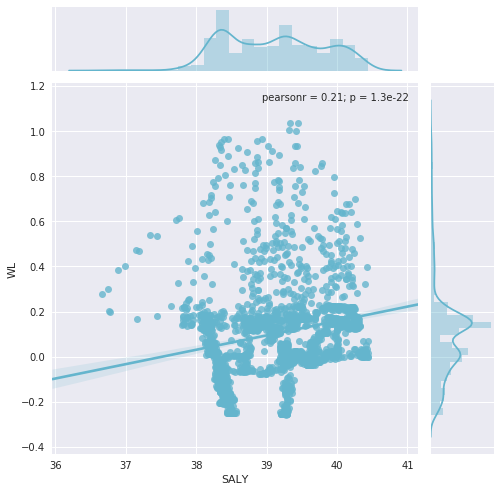

In [12]:
#Nivel de mar-Salinidad.
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("SALY", "WL", data=df3, kind="reg",
                   color="c", size=7)
plt.show(g)

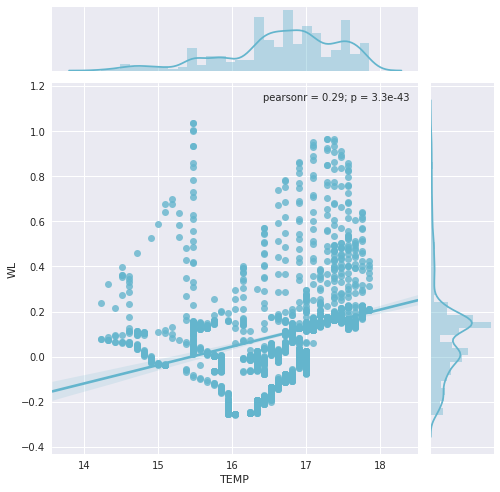

In [13]:
#Nivel de mar-Temperatura del agua.
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("TEMP", "WL", data=df1, kind="reg",
                   color="C", size=7)
plt.show(g)

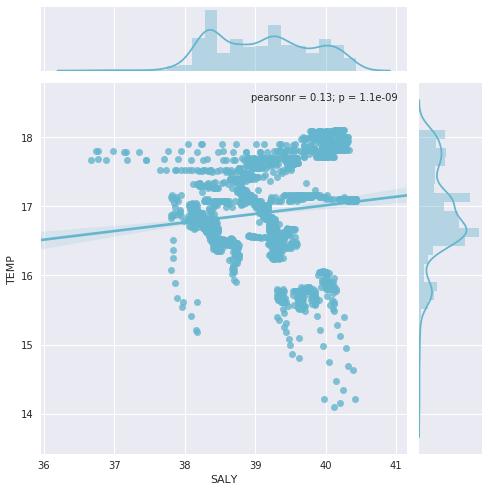

In [14]:
#Salinidad-Temperatura del agua.
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("SALY", "TEMP", data=df2, kind="reg",
                   color="c", size=7)
plt.show(g)

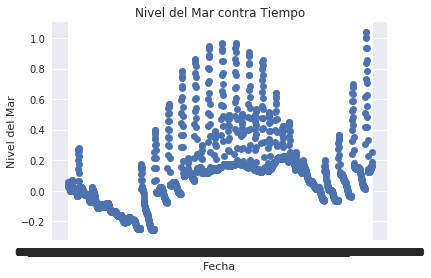

In [15]:
plt.plot_date(x=df1.Date, y=df1['WL'])
plt.title("Nivel del Mar contra Tiempo")
plt.ylabel("Nivel del Mar")
plt.xlabel("Fecha")
plt.show()

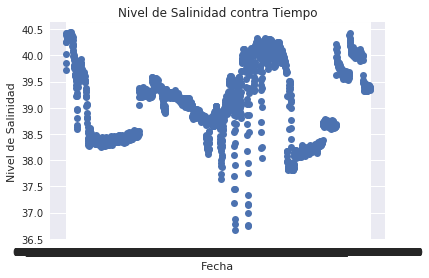

In [16]:
plt.plot_date(x=df2.Date, y=df2['SALY'])
plt.title("Nivel de Salinidad contra Tiempo")
plt.ylabel("Nivel de Salinidad")
plt.xlabel("Fecha")
plt.show()

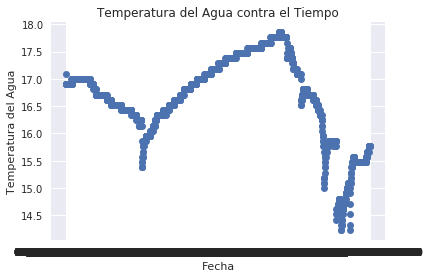

In [17]:
plt.plot_date(x=df1.Date, y=df1['TEMP'])
plt.title("Temperatura del Agua contra el Tiempo")
plt.ylabel("Temperatura del Agua")
plt.xlabel("Fecha")
plt.show()

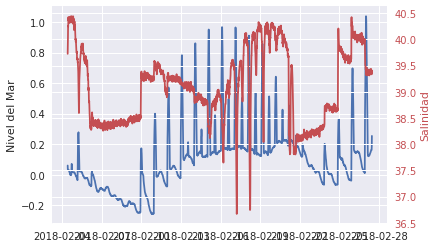

In [18]:
#Gráfica doble eje vertical de nivel de mar y salinidad.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df1.Ndate, df1.WL)
ax1.set_ylabel('Nivel del Mar')

ax2 = ax1.twinx()
ax2.plot(df2.Ndate, df2.SALY, 'r-')
ax2.set_ylabel('Salinidad', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

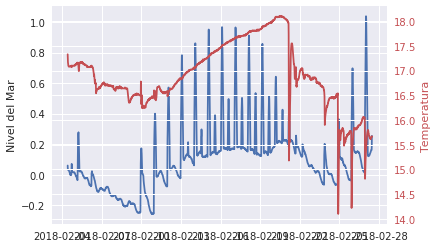

In [19]:
#Gráfica doble eje vertical de nivel de mar y temperatura.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df1.Ndate, df1.WL)
ax1.set_ylabel('Nivel del Mar')

ax2 = ax1.twinx()
ax2.plot(df2.Ndate, df2.TEMP, 'r-')
ax2.set_ylabel('Temperatura', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()